In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from amacrine_color_schema import *

Connecting sstrauss@172.25.240.205:3306


Load data

In [2]:
stim = pd.DataFrame.from_dict(((BGTestSequences() - 
                                [Pharmacology() & 'control_flag = 0' & 'treatment != "control"'] - 
                                [Indicator() & 'virustransprotein = "GCaMP8f"'])).fetch(as_dict=True))

Remove field where we dont have chirp

In [3]:
stim[(stim['date'] == datetime.date(2021,7,7)) & (stim['exp_num'] == 1) & (stim['field_id'] == 1)]

,artefact_kernel_id,experimenter,date,exp_num,field_id,preprocess_param_set_id,stim_id,presentation_id,noise_id,test_sequences,test_sequences_stims
5,1,Korympidou,2021-07-07,1,1,1,15,5,1,"[[[1.7020774013763824, -0.4299693656218109, -0...","[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."


In [4]:
stim.drop([5], inplace = True)
stim = stim.reset_index(drop = True)

In [5]:
stim[3:7]

,artefact_kernel_id,experimenter,date,exp_num,field_id,preprocess_param_set_id,stim_id,presentation_id,noise_id,test_sequences,test_sequences_stims
3,1,Korympidou,2021-06-29,2,2,1,15,5,1,"[[[-0.248815171837782, 0.21319581779636385, -0...","[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
4,1,Korympidou,2021-06-29,2,3,1,15,6,1,"[[[-0.5562976618171718, 0.855261860433156, 0.7...","[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
5,1,Korympidou,2021-07-07,1,2,1,15,6,1,"[[[-0.27369631344896156, 0.18313590758869913, ...","[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
6,1,Korympidou,2021-07-07,1,3,1,15,7,1,"[[[0.019896601310906134, 0.2918440353135203, 0...","[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."


Look at correlations across repetitions within one field

In [6]:
nb_fields = len(stim)
correlations = np.zeros((6,nb_fields))

for i in np.arange(nb_fields):
    current_stim = stim['test_sequences_stims'].iloc[i]
    for j in np.arange(6):
        corr_reps = np.array([np.corrcoef(current_stim[j,:,0], current_stim[j,:,1])[0,1],
                              np.corrcoef(current_stim[j,:,0], current_stim[j,:,2])[0,1],
                              np.corrcoef(current_stim[j,:,0], current_stim[j,:,3])[0,1],
                              np.corrcoef(current_stim[j,:,1], current_stim[j,:,2])[0,1],
                              np.corrcoef(current_stim[j,:,1], current_stim[j,:,3])[0,1],
                              np.corrcoef(current_stim[j,:,2], current_stim[j,:,3])[0,1]])
        correlations[j,i] = np.mean(corr_reps)

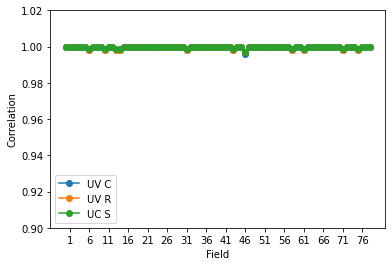

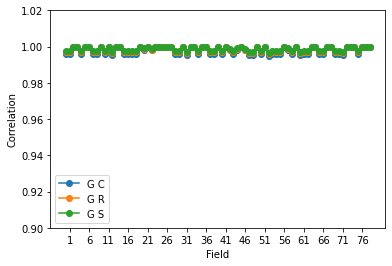

In [7]:
labels = ['UV C', 'UV R', 'UC S', 'G C', 'G R', 'G S']

for index, label in enumerate(labels[0:3]):

    plt.plot(correlations[index,:], 'o-', label = label)
plt.xlabel('Field')
plt.ylabel('Correlation')
plt.legend()
plt.xticks(np.arange(1,80,5))
plt.ylim([0.9,1.02])
plt.show()

for index, label in enumerate(labels[3:]):

    plt.plot(correlations[index+3,:], 'o-', label = label)
plt.xlabel('Field')
plt.ylabel('Correlation')
plt.legend()
plt.xticks(np.arange(1,80,5))
plt.ylim([0.9,1.02])
plt.show()

Look at correlations

In [8]:
nb_fields = len(stim)
correlations = np.zeros((6,nb_fields))

for i in np.arange(nb_fields):
    other_fields = list(np.arange(0,nb_fields))
    other_fields.pop(i)
    
    current_stim = np.mean(stim['test_sequences_stims'].iloc[i], axis = -1)
    moving_correlations = []
    for j in other_fields:
        
        other_stim = np.mean(stim['test_sequences_stims'].iloc[j], axis = -1)
        
        moving_correlations.append([np.corrcoef(current_stim[0,:], other_stim[0,:])[0,1],
                                    np.corrcoef(current_stim[1,:], other_stim[1,:])[0,1],
                                    np.corrcoef(current_stim[2,:], other_stim[2,:])[0,1],
                                    np.corrcoef(current_stim[3,:], other_stim[3,:])[0,1],
                                    np.corrcoef(current_stim[4,:], other_stim[4,:])[0,1],
                                    np.corrcoef(current_stim[5,:], other_stim[5,:])[0,1]])
        
    correlations[:,i] = np.mean(np.vstack(moving_correlations), axis = 0)

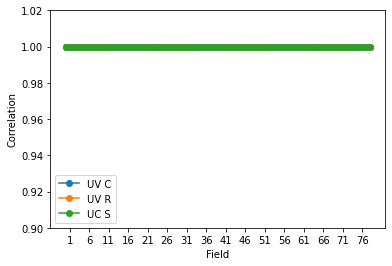

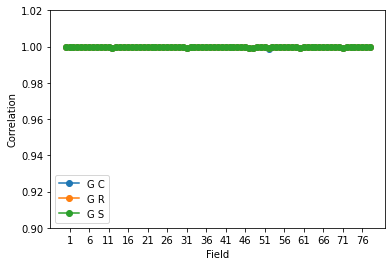

In [9]:
labels = ['UV C', 'UV R', 'UC S', 'G C', 'G R', 'G S']

for index, label in enumerate(labels[0:3]):

    plt.plot(correlations[index,:], 'o-', label = label)
plt.xlabel('Field')
plt.ylabel('Correlation')
plt.legend()
plt.xticks(np.arange(1,80,5))
plt.ylim([0.9,1.02])
plt.show()

for index, label in enumerate(labels[3:]):

    plt.plot(correlations[index+3,:], 'o-', label = label)
plt.xlabel('Field')
plt.ylabel('Correlation')
plt.legend()
plt.xticks(np.arange(1,80,5))
plt.ylim([0.9,1.02])
plt.show()

Average across fields and repetitions and make binary

In [10]:
green_center_stim = []
green_ring_stim = []
green_surround_stim = []
uv_center_stim = []
uv_ring_stim = []
uv_surround_stim = []
nb_fields = len(stim)

for i in np.arange(nb_fields):
    
    big_stim = stim['test_sequences_stims'].iloc[i]
    
    for j in np.arange(4):
        uv_center_stim.append(big_stim[0,:,j])
        uv_ring_stim.append(big_stim[1,:,j])
        uv_surround_stim.append(big_stim[2,:,j])
        green_center_stim.append(big_stim[3,:,j])
        green_ring_stim.append(big_stim[4,:,j])
        green_surround_stim.append(big_stim[5,:,j])
    
average_uv_center = ((np.mean(np.vstack(uv_center_stim), axis = 0)) > 0.5)*1
average_uv_ring = ((np.mean(np.vstack(uv_ring_stim), axis = 0)) > 0.5)*1
average_uv_surround = ((np.mean(np.vstack(uv_surround_stim), axis = 0)) > 0.5)*1

average_green_center = ((np.mean(np.vstack(green_center_stim), axis = 0)) > 0.5)*1
average_green_ring = ((np.mean(np.vstack(green_ring_stim), axis = 0)) > 0.5)*1
average_green_surround = ((np.mean(np.vstack(green_surround_stim), axis = 0)) > 0.5)*1

In [11]:
test_sequences_flicker = np.vstack((average_uv_center, average_uv_ring, average_uv_surround,
                                    average_green_center, average_green_ring, average_green_surround))

Save stimuli

In [12]:
#np.save('Data/ACs/Stim/test_sequences_flicker.npy', test_sequences_flicker)

Unravel responses

In [13]:
columns = ['date', 'exp_num', 'field_id', 'roi', 'test_seq_response']
df = pd.DataFrame(columns=columns)

for index, row in stim.iterrows():
    
    nb_rois = row['test_sequences'].shape[0]
    responses = np.mean(row['test_sequences'], axis = -1)
    
    current_data = {'date': np.repeat(row['date'], nb_rois), 
                    'exp_num': np.repeat(row['exp_num'], nb_rois), 
                    'field_id': np.repeat(row['field_id'], nb_rois), 
                    'roi': np.arange(1,nb_rois+1),
                    'test_seq_response': list(responses)}
    df = pd.concat([df, pd.DataFrame(current_data, columns = columns)], ignore_index = True)

Load df with labels and merge dataframes

In [14]:
X = pd.read_pickle('Data/ACs/Dataframes/snippets_control_data_gmm_pcaColor_3Components_labels.pkl')

In [15]:
match_on = ['date', 'exp_num', 'field_id', 'roi']

final = X.merge(df, how='inner', on=match_on)
assert len(final) == len(X)
print(len(final))
print(len(X))

5378
5378


Calculate cluster averages

In [16]:
from clustering_utils import cluster_average

In [17]:
test_seq_response = cluster_average(final, 'cluster ID (diag)', 'test_seq_response')

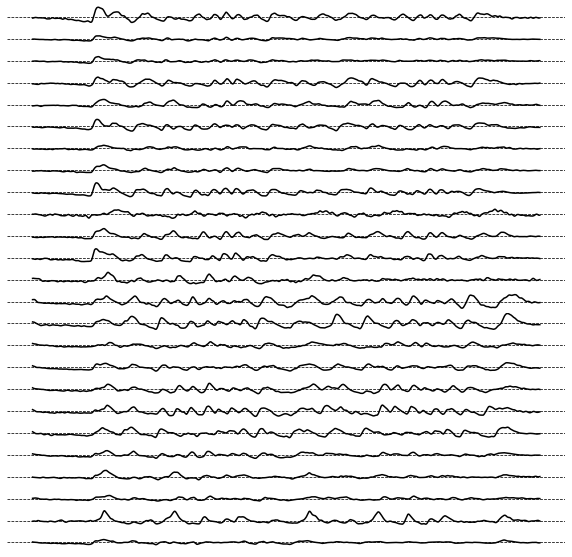

In [18]:
nb_clusters = test_seq_response.shape[0]
fig, ax = plt.subplots(nb_clusters, 1, sharex='all', sharey='all', figsize=(10,10))
for current_cluster_ID in range(nb_clusters):
    my_ax = ax[current_cluster_ID]
    my_ax.axis('off')
    my_ax.axhline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75)
    my_ax.plot(test_seq_response[current_cluster_ID,:], color = 'black', linewidth = 1.5)
plt.show()

Save data

In [19]:
#np.save('Data/ACs/Cluster Averages/test_seq_response_avrg.npy', test_seq_response)
#final.to_pickle('Data/ACs/Dataframes/test_seq_control_data_gmm_pcaColor_3Components_labels.pkl')